# COMP3055 Machine Learning Coursework

## Task 1

In [1]:
# Load data
import numpy as np

data_file = './wdbc.data'

data = np.genfromtxt(data_file, delimiter=',', dtype=str)
labels = data[:, 1]

# Replace 'M' with 1, 'B' with 0
labels = np.where(labels == 'M', 1, 0)

data = np.genfromtxt(data_file, delimiter=',')
features = data[:, 2:]

# Print to verify
print("Labels:", labels[:5])
print("Features:", features[:5])


Labels: [1 1 1 1 1]
Features: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861

In [2]:
#  Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=169, random_state=42)


print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (400, 30)
Testing Data Shape: (169, 30)


In [3]:
# Dimensionality reduction by PCA
from sklearn.decomposition import PCA

dimensions = [5, 10, 15, 20]

all_X_train_pca = []  
all_X_test_pca = []

for dim in dimensions:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    all_X_train_pca.append(X_train_pca)
    all_X_test_pca.append(X_test_pca)
    
    print(f"\nDimension: {dim}")
    print("Explained Variance Ratio (first 3 components):", pca.explained_variance_ratio_[:3])
    print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))
    print("Reduced Training Data Shape:", X_train_pca.shape)
    print("Reduced Testing Data Shape:", X_test_pca.shape)


all_X_train_pca.append(X_train)
all_X_test_pca.append(X_test)
dimensions.append(30)


Dimension: 5
Explained Variance Ratio (first 3 components): [0.98135836 0.01651178 0.00191012]
Cumulative Explained Variance Ratio: [0.98135836 0.99787014 0.99978025 0.99990627 0.99998835]
Reduced Training Data Shape: (400, 5)
Reduced Testing Data Shape: (169, 5)

Dimension: 10
Explained Variance Ratio (first 3 components): [0.98135836 0.01651178 0.00191012]
Cumulative Explained Variance Ratio: [0.98135836 0.99787014 0.99978025 0.99990627 0.99998835 0.99999451
 0.99999855 0.99999937 0.99999975 0.9999999 ]
Reduced Training Data Shape: (400, 10)
Reduced Testing Data Shape: (169, 10)

Dimension: 15
Explained Variance Ratio (first 3 components): [0.98135836 0.01651178 0.00191012]
Cumulative Explained Variance Ratio: [0.98135836 0.99787014 0.99978025 0.99990627 0.99998835 0.99999451
 0.99999855 0.99999937 0.99999975 0.9999999  0.99999997 0.99999998
 0.99999999 0.99999999 1.        ]
Reduced Training Data Shape: (400, 15)
Reduced Testing Data Shape: (169, 15)

Dimension: 20
Explained Varian

## Task 2

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to evaluate KNN models and return evaluation metrics
def evaluate_knn(X_train, X_test, y_train, y_test, k, dimension):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:, :dimension], y_train)
    
    y_pred = knn.predict(X_test[:, :dimension])
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1) 
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    return accuracy, precision, recall, f1

# Perform KNN with different feature dimensions and K values
results = {'dimension': [], 'k': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for i, dim in enumerate(dimensions):
    X_train_pca = all_X_train_pca[i]
    X_test_pca = all_X_test_pca[i]
    
    for k_value in [1, 3, 5, 7, 9]:
        accuracy, precision, recall, f1 = evaluate_knn(X_train_pca, X_test_pca, y_train, y_test, k_value, dim)
        
        # Save results
        results['dimension'].append(dim)
        results['k'].append(k_value)
        results['accuracy'].append(accuracy)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1'].append(f1)
        # print(results)

# Create a DataFrame for visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

    dimension  k  accuracy  precision    recall        f1
0           5  1  0.934911   0.932203  0.887097  0.909091
1           5  3  0.946746   0.934426  0.919355  0.926829
2           5  5  0.970414   0.983051  0.935484  0.958678
3           5  7  0.964497   0.966667  0.935484  0.950820
4           5  9  0.964497   0.966667  0.935484  0.950820
5          10  1  0.934911   0.932203  0.887097  0.909091
6          10  3  0.946746   0.934426  0.919355  0.926829
7          10  5  0.970414   0.983051  0.935484  0.958678
8          10  7  0.964497   0.966667  0.935484  0.950820
9          10  9  0.964497   0.966667  0.935484  0.950820
10         15  1  0.934911   0.932203  0.887097  0.909091
11         15  3  0.946746   0.934426  0.919355  0.926829
12         15  5  0.970414   0.983051  0.935484  0.958678
13         15  7  0.964497   0.966667  0.935484  0.950820
14         15  9  0.964497   0.966667  0.935484  0.950820
15         20  1  0.934911   0.932203  0.887097  0.909091
16         20 

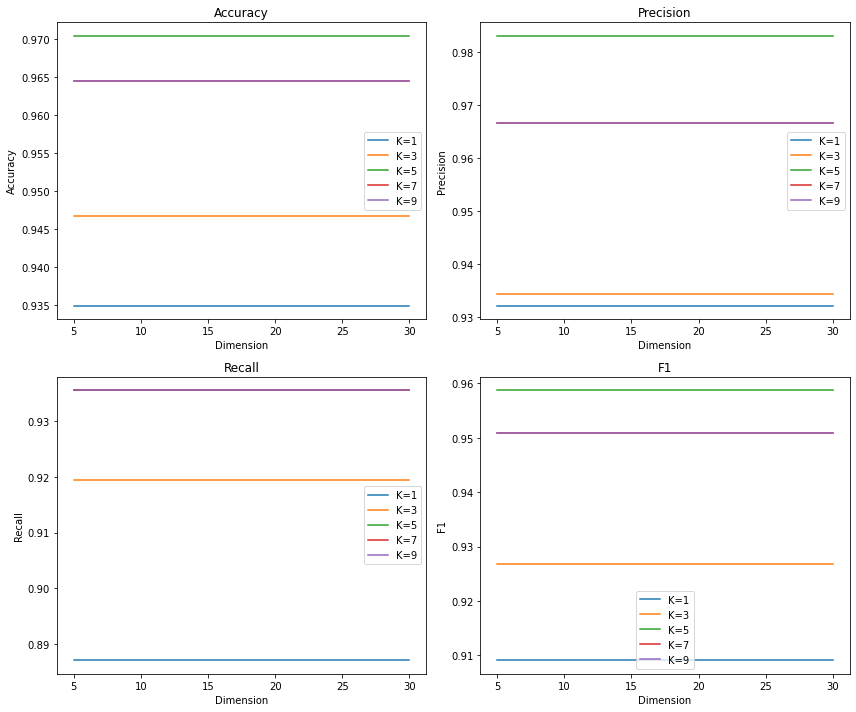

In [5]:
import matplotlib.pyplot as plt

# Plotting with matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Plot for each K value
    for k_value in [1, 3, 5, 7, 9]:
        k_results = results_df[results_df['k'] == k_value]
        ax.plot(k_results['dimension'], k_results[metric], label=f'K={k_value}')
    
    ax.set_title(metric.capitalize())
    ax.set_xlabel('Dimension')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()


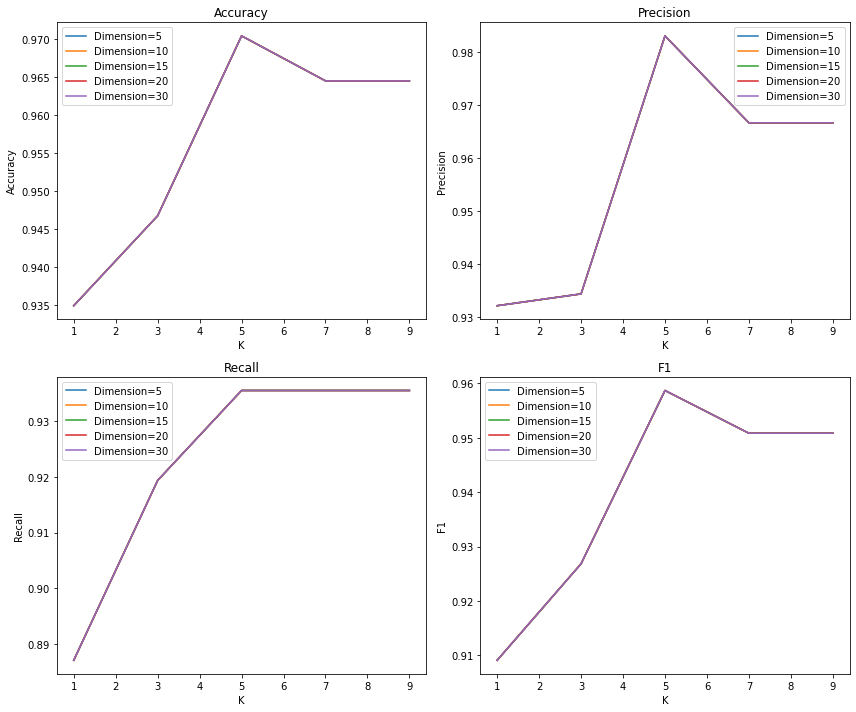

In [6]:
import matplotlib.pyplot as plt

# Plotting with matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define dimensions
dimensions = [5, 10, 15, 20, 30]

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Plot for each dimension
    for dimension in dimensions:
        dimension_results = results_df[results_df['dimension'] == dimension]
        ax.plot(dimension_results['k'], dimension_results[metric], label=f'Dimension={dimension}')
    
    ax.set_title(metric.capitalize())
    ax.set_xlabel('K')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()


# Task 3

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define the combination of hyperparameters to be tested
layers = [1, 2, 3, 4]
nodes = [50, 100, 150]
learning_rates = [0.001, 0.01, 0.1]
alphas = [0, 0.0001, 0.001, 0.01]
# dimensions = [5, 10, 15, 20, 30] 
dimensions = [5] 
solvers = ['adam'] 

results_mlp = {'layers': [], 'nodes': [], 'learning_rate': [], 'alpha': [], 'dimension': [], 'solver': [],
               'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for dimension in dimensions:
    if dimension != 30:
        pca = PCA(n_components=dimension)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else: 
        X_train_pca = X_train
        X_test_pca = X_test
    for layer in layers:
        for node in nodes:
            for learning_rate in learning_rates:
                for alpha in alphas:
                    for solver in solvers:
                        hidden_layer = tuple([node] * layer)
                        mlp = MLPClassifier(random_state=42)
                        mlp.set_params(hidden_layer_sizes=hidden_layer, learning_rate_init=learning_rate,
                                       alpha=alpha, solver=solver)
                        
                        # Use 5-fold cross-validation to train and validate the model
                        cross_val_scores = cross_val_score(mlp, X_train_pca, y_train, cv=5, scoring='accuracy')
                        avg_accuracy = cross_val_scores.mean()
                        
                        # Record results
                        results_mlp['layers'].append(layer)
                        results_mlp['nodes'].append(node)
                        results_mlp['learning_rate'].append(learning_rate)
                        results_mlp['alpha'].append(alpha)
                        results_mlp['dimension'].append(dimension)
                        results_mlp['solver'].append(solver)
                        results_mlp['accuracy'].append(avg_accuracy)
                        
                        # Train the final model (on the entire training set)
                        mlp.fit(X_train_pca, y_train)
                        
                        # Evaluate the model on the test set
                        y_pred = mlp.predict(X_test_pca)
                        precision = precision_score(y_test, y_pred)
                        recall = recall_score(y_test, y_pred)
                        f1 = f1_score(y_test, y_pred)
                        
                        # Record test set results
                        results_mlp['precision'].append(precision)
                        results_mlp['recall'].append(recall)
                        results_mlp['f1'].append(f1)

# Organize the result into a DataFrame or other appropriate format
import pandas as pd
results_mlp_df = pd.DataFrame(results_mlp)


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

In [8]:
# Print or visualize the results
# print(results_mlp_df)

In [9]:
# Find the index for the best parameter
best_index = results_mlp_df['accuracy'].idxmax()

# Print the best parameters
best_layers = results_mlp_df.loc[best_index, 'layers']
best_nodes = results_mlp_df.loc[best_index, 'nodes']
best_learning_rate = results_mlp_df.loc[best_index, 'learning_rate']
best_alpha = results_mlp_df.loc[best_index, 'alpha']
best_dimension = results_mlp_df.loc[best_index, 'dimension']
best_solver = results_mlp_df.loc[best_index, 'solver']
best_accuracy = results_mlp_df.loc[best_index, 'accuracy']

print(f'Best Layers: {best_layers}')
print(f'Best Nodes: {best_nodes}')
print(f'Best Learning Rate: {best_learning_rate}')
print(f'Best Alpha: {best_alpha}')
print(f'Best Dimension: {best_dimension}')
print(f'Best Solver: {best_solver}')
print(f'Best Accuracy: {best_accuracy}')


Best Layers: 2
Best Nodes: 150
Best Learning Rate: 0.01
Best Alpha: 0.001
Best Dimension: 5
Best Solver: adam
Best Accuracy: 0.9375


# Task 4

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import time

if best_dimension != 30:
    pca = PCA(n_components=best_dimension)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
else:
    X_train_pca = X_train
    X_test_pca = X_test
    
hidden_layer = tuple([best_nodes] * best_layers)

start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
knn_prediction = knn_model.predict(X_test_pca)
knn_time = time.time() - start_time
knn_train_prediction = knn_model.predict(X_train_pca)

start_time = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer, learning_rate_init=best_learning_rate, alpha=best_alpha,solver=best_solver)
mlp_model.fit(X_train_pca, y_train)
mlp_prediction = mlp_model.predict(X_test_pca)
mlp_time = time.time() - start_time
mlp_train_prediction = mlp_model.predict(X_train_pca)

print(f'KNN Time: {knn_time}')
print(f'MLP Time: {mlp_time}')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_accuracy = accuracy_score(y_test, knn_prediction)
print(f'KNN Accuracy: {knn_accuracy}')
mlp_accuracy = accuracy_score(y_test, mlp_prediction)
print(f'MLP Accuracy: {mlp_accuracy}')

knn_precision = precision_score(y_test, knn_prediction)
print(f'KNN Precision: {knn_precision}')
mlp_precision = precision_score(y_test, mlp_prediction)
print(f'MLP Precision: {mlp_precision}')

knn_recall = recall_score(y_test, knn_prediction)
print(f'KNN Recall: {knn_recall}')
mlp_recall = recall_score(y_test, mlp_prediction)
print(f'MLP Recall: {mlp_recall}')

knn_f1 = f1_score(y_test, knn_prediction)
print(f'KNN F1: {knn_f1}')
mlp_f1 = f1_score(y_test, mlp_prediction)
print(f'MLP F1: {mlp_f1}')

knn_train_accuracy = accuracy_score(y_train, knn_train_prediction)
knn_test_accuracy = accuracy_score(y_test, knn_prediction)

mlp_train_accuracy = accuracy_score(y_train, mlp_train_prediction)
mlp_test_accuracy = accuracy_score(y_test, mlp_prediction)

knn_overfitting_index = knn_train_accuracy - knn_test_accuracy
mlp_overfitting_index = mlp_train_accuracy - mlp_test_accuracy

print(f'KNN Overfitting Index: {knn_overfitting_index}')
print(f'MLP Overfitting Index: {mlp_overfitting_index}')

knn_overfitting_rate = knn_train_accuracy / knn_test_accuracy
mlp_overfitting_rate = mlp_train_accuracy / mlp_test_accuracy

print(f'KNN Overfitting Rate: {knn_overfitting_rate}')
print(f'MLP Overfitting Rate: {mlp_overfitting_rate}')

knn_overfitting_percentage = ((knn_train_accuracy - knn_test_accuracy) / knn_test_accuracy) * 100
mlp_overfitting_percentage = ((mlp_train_accuracy - mlp_test_accuracy) / mlp_test_accuracy) * 100

print(f'KNN Overfitting Percentage: {knn_overfitting_percentage}%')
print(f'MLP Overfitting Percentage: {mlp_overfitting_percentage}%')

KNN Time: 0.006001472473144531
MLP Time: 0.2986438274383545
KNN Accuracy: 0.9704142011834319
MLP Accuracy: 0.9349112426035503
KNN Precision: 0.9830508474576272
MLP Precision: 0.8805970149253731
KNN Recall: 0.9354838709677419
MLP Recall: 0.9516129032258065
KNN F1: 0.9586776859504132
MLP F1: 0.9147286821705426
KNN Overfitting Index: -0.047914201183431926
MLP Overfitting Index: 0.03258875739644973
KNN Overfitting Rate: 0.950625
MLP Overfitting Rate: 1.034857594936709
KNN Overfitting Percentage: -4.937499999999997%
MLP Overfitting Percentage: 3.485759493670889%


In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, mlp_prediction, output_dict=True, target_names=[1, 0], zero_division=1)

In [12]:
report

{1: {'precision': 0.9705882352941176,
  'recall': 0.9252336448598131,
  'f1-score': 0.9473684210526315,
  'support': 107.0},
 0: {'precision': 0.8805970149253731,
  'recall': 0.9516129032258065,
  'f1-score': 0.9147286821705426,
  'support': 62.0},
 'accuracy': 0.9349112426035503,
 'macro avg': {'precision': 0.9255926251097454,
  'recall': 0.9384232740428098,
  'f1-score': 0.9310485516115871,
  'support': 169.0},
 'weighted avg': {'precision': 0.9375737047446374,
  'recall': 0.9349112426035503,
  'f1-score': 0.9353940789775457,
  'support': 169.0}}

In [13]:
for i in range(len(y_test)):
    print(f'Sample {i + 1}:')
    print(f'Real Label: {y_test[i]}, KNN Prediction: {knn_prediction[i]}, MLP Prediction: {mlp_prediction[i]}')
    print('---')

Sample 1:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 1
---
Sample 2:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 3:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 4:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 5:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 6:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 7:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 8:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 9:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 10:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 11:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 12:
Real Label: 1, KNN Prediction: 1, MLP Prediction: 1
---
Sample 13:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Sample 14:
Real Label: 1, KNN Prediction: 0, MLP Prediction: 1
---
Sample 15:
Real Label: 0, KNN Prediction: 0, MLP Prediction: 0
---
Samp